In [1]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [2]:
import pandas as pd

In [3]:
# Explore data

df = pd.read_csv("DATA/student_scores.csv", encoding="latin1")
df = df[['Hours','Scores']]

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


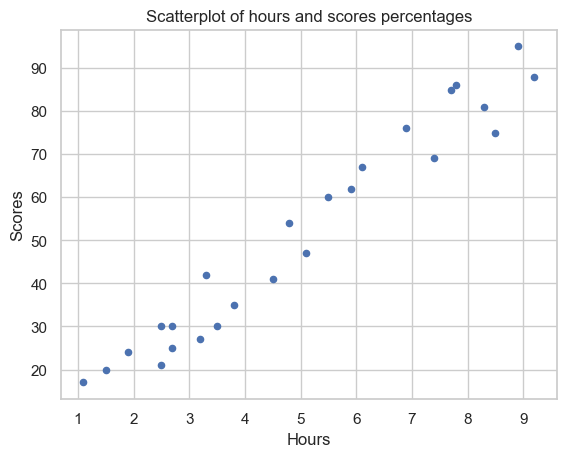

In [4]:
df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages');

In [5]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In this table, Hours and Hours have a 1.0 (100%) correlation, just as Scores have a 100% correlation to Scores, naturally. Any variable will have a 1:1 mapping with itself! However, the correlation between Scores and Hours is 0.97. Anything above 0.8 is considered to be a strong positive correlation.

In [6]:
print(df.describe())


           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [7]:
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

If your DataFrame (df) looks like this:

   Hours  Scores
0      2      75
1      4      88
2      5      92
After running the code, you'll have:

y: A NumPy array representing the 'Scores': [[75], [88], [92]]
X: A NumPy array representing the 'Hours': [[2], [4], [5]]


Line 1: y = df['Scores'].values.reshape(-1, 1)

df['Scores']: This extracts the column named 'Scores' from a Pandas DataFrame (df), which is a tabular data structure. It assumes that the 'Scores' column contains the target variable or the values you want to predict.
.values: This converts the extracted 'Scores' column into a NumPy array. NumPy arrays are efficient for numerical operations and are often required by machine learning libraries.
.reshape(-1, 1): This reshapes the NumPy array into a 2-dimensional array with a single column.
-1 as the first argument means that NumPy will automatically calculate the number of rows needed to fit all the data.
1 as the second argument means that there will be exactly one column.
In summary, this line prepares the target variable (y) for machine learning by ensuring it's a 2D array with a single column, which is the common format for many machine learning algorithms.

Why reshape?

Compatibility: Many machine learning algorithms expect the input features (X) and target variable (y) to be 2D arrays. Reshaping ensures your data is in the correct format.
Consistency: Even if your data only has one feature or one target variable, reshaping it into a 2D array maintains consistency across different datasets and models.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Since the sampling process is inherently random, we will always have different results when running the method. To be able to have the same results, or reproducible results, we can define a constant called SEED that has the value of the meaning of life (42)

In [9]:
SEED = 42

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [11]:
print(X_train) # [[2.7] [3.3] [5.1] [3.8] ... ]
print(y_train) # [[25] [42] [47] [35] ... ]

[[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
[[25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]
 [67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]


In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
regressor.fit(X_train, y_train)

LinearRegression()

In the context of linear regression, regressor.intercept_ and regressor.coef_ are attributes of the trained linear regression model. Here's what they represent:

regressor.intercept_: This attribute represents the intercept term or the bias of the linear regression model. In a linear regression equation of the form y = mx + c, where y is the predicted variable, x is the input variable, m is the coefficient or weight, and c is the intercept, regressor.intercept_ corresponds to the value of c. It represents the value of y when x is zero. In other words, it is the predicted value of the target variable when all the input features are zero.

regressor.coef_: This attribute represents the coefficients or weights assigned to the input features of the linear regression model. For a linear regression equation y = m1*x1 + m2*x2 + ... + mn*xn + c, where y is the predicted variable, x1, x2, ..., xn are the input features, m1, m2, ..., mn are the coefficients or weights associated with each input feature, and c is the intercept, regressor.coef_ is an array that contains the values of m1, m2, ..., mn. Each element in regressor.coef_ corresponds to the weight assigned to the respective input feature.

By accessing these attributes, you can obtain the learned coefficients and intercept of the trained linear regression model. These values provide insights into the relationship between the input features and the target variable, allowing you to interpret the impact of each feature on the predicted outcome.

In [14]:
print(regressor.intercept_)

[2.82689235]


In [15]:
print(regressor.coef_)

[[9.68207815]]


This can quite literally be plugged in into our formula from before:

s
c
o
r
e
=
9.68207815
∗
h
o
u
r
s
+
2.82689235
Let's check real quick whether this aligns with our guesstimation:

h
o
u
r
s
=
5
s
c
o
r
e
=
9.68207815
∗
h
o
u
r
s
+
2.82689235
s
c
o
r
e
=
51.2672831

In [16]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

#score = calc(regressor.coef_, regressor.intercept_, 9.5)
score = calc(regressor.coef_, regressor.intercept_, 6.9)
print(score)

[[69.63323162]]


In [17]:
y_pred = regressor.predict(X_test)

In [18]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In the code snippet you provided, squeeze() is a method that is applied to the pandas Series objects y_test and y_pred. The squeeze() method is used to remove single-dimensional entries from the shape of the Series and convert it into a 1D array or a pandas Series without any extra dimensions.

Here's what squeeze() does in this context:

y_test.squeeze(): This line applies the squeeze() method to the y_test Series. If the y_test Series has a shape of (n, 1) where n is the number of elements, the squeeze() method will remove the extra dimension and convert it into a 1D array or a pandas Series of shape (n,).

y_pred.squeeze(): Similarly, this line applies the squeeze() method to the y_pred Series. It removes any single-dimensional entries and converts it into a 1D array or a pandas Series if it has a shape of (n, 1).

The purpose of using squeeze() in this context is to ensure that the 'Actual' and 'Predicted' columns of the df_preds DataFrame have the same shape and are aligned correctly. By removing the extra dimension, it ensures that the columns are represented as 1D arrays or pandas Series with matching lengths.

The resulting df_preds DataFrame will have two columns: 'Actual' and 'Predicted', where each column contains the values of the corresponding Series (y_test and y_pred) without any extra dimensions.

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
import numpy as np

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [22]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3.92
Mean squared error: 18.94
Root mean squared error: 4.35


Mean Absolute Error (MAE): 3.92

Meaning: On average, your model's predictions are off by 3.92 units from the actual values.
Interpretation: This is a fairly low MAE, suggesting that your model is making predictions that are reasonably close to the true values. Whether this is considered "good" or not depends on the context of your problem and the scale of your target variable.
Mean Squared Error (MSE): 18.94

Meaning: The average of the squared differences between the predicted and actual values is 18.94.
Interpretation: Squaring the errors amplifies the impact of larger errors. While the MSE itself isn't directly interpretable in the units of your target variable, it indicates that there's some variance in the errors. However, since the RMSE is relatively low (see below), this suggests that there aren't many extremely large errors.
Root Mean Squared Error (RMSE): 4.35

Meaning: The square root of the MSE, which puts the error back into the original unit of the target variable.
Interpretation: On average, your model's predictions deviate from the actual values by about 4.35 units. This confirms the interpretation of the MAE that the model is performing reasonably well, with errors not being too far off from the actual values.

All of our errors are low - and we're missing the actual value by 4.35 at most (lower or higher), which is a pretty small range considering the data we have.

In [23]:
# Explore data

df = pd.read_csv("DATA/petrol_consumption.csv")
df = df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_Consumption']]

df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [24]:
print(df.describe().round(2).T)

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


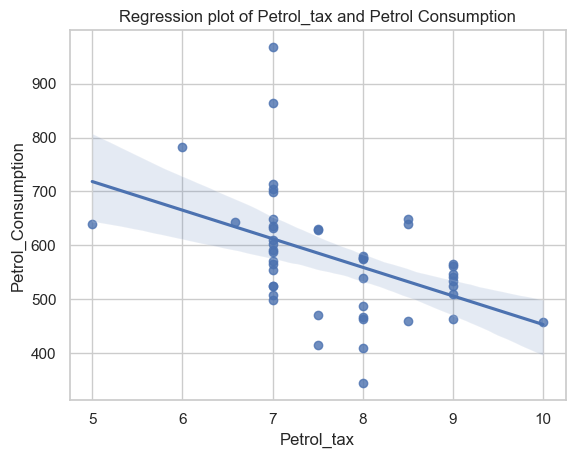

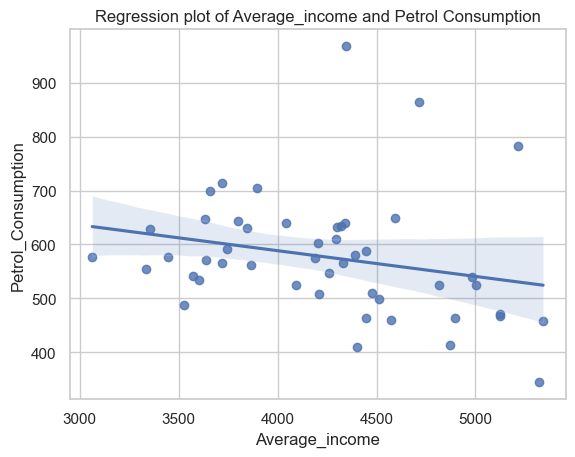

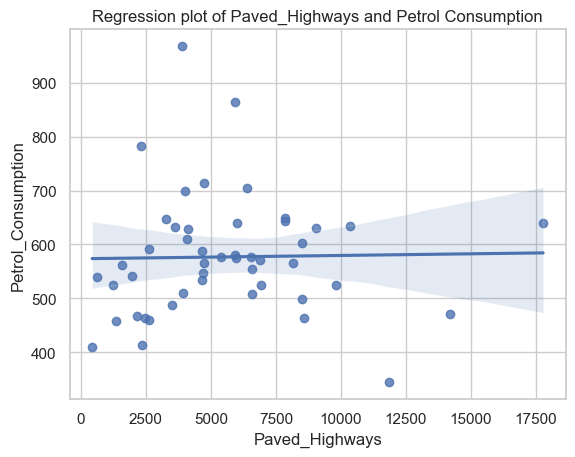

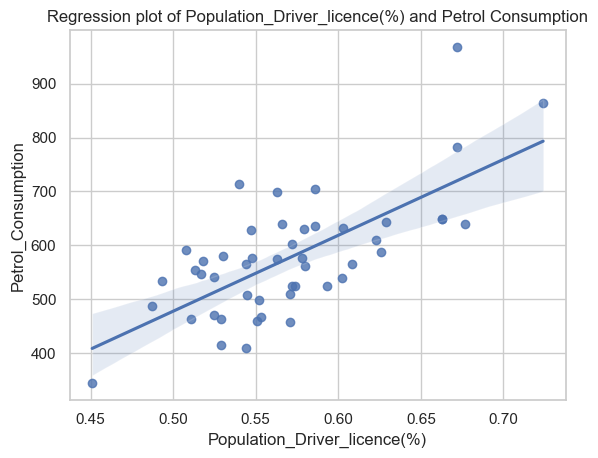

In [25]:
import seaborn as sns # Convention alias for Seaborn

variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');

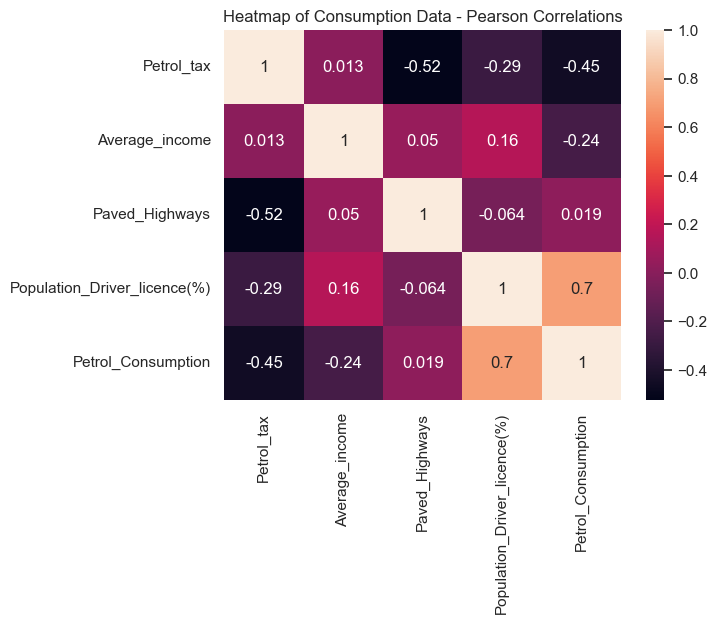

In [26]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

In [27]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
regressor.intercept_

361.4508790666835

In [31]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

In [32]:
feature_names = X.columns

In [33]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients,
                              index = feature_names,
                              columns = ['Coefficient value'])
print(coefficients_df)

                              Coefficient value
Average_income                        -0.056536
Paved_Highways                        -0.004382
Population_Driver_licence(%)        1346.869298
Petrol_tax                           -36.993746


In [34]:
y_pred = regressor.predict(X_test)

In [35]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 53.47
Mean squared error: 4083.26
Root mean squared error: 63.90


Mean Absolute Error (MAE):

Meaning: The average of the absolute differences between the predicted and actual values.
Interpretation: On average, your model's predictions are off by 53.47 units. This metric is easy to understand as it is in the same unit as the target variable.
Mean Squared Error (MSE):

Meaning: The average of the squared differences between the predicted and actual values.
Interpretation: This metric gives more weight to larger errors due to the squaring. The value of 4083.26 indicates that there's a substantial amount of error variance, suggesting your model might be struggling with certain predictions.
Root Mean Squared Error (RMSE):

Meaning: The square root of the MSE.
Interpretation: This metric is in the same unit as the target variable, making it easier to interpret than MSE. The RMSE of 63.90 means that, on average, your model's predictions deviate from the actual values by about 63.90 units. It provides a good overall measure of model accuracy.

Label Encoding:

When dealing with ordinal categorical variables where the order of categories has significance, such as 'low', 'medium', 'high', or 'small', 'medium', 'large'.
When you want a simple and compact representation of categorical variables.
Note: Be cautious when using label encoding with algorithms that assume numerical values have meaningful magnitude or order, as it may introduce unintended biases.


One-Hot Encoding:

When dealing with nominal categorical variables where the order of categories does not matter.
When you want to avoid imposing any ordinal relationship between categories.
When the number of categories is small or manageable to avoid the curse of dimensionality.
Note: One-hot encoding can increase the dimensionality of the dataset, which may affect the performance of some machine learning algorithms or lead to multicollinearity issues.


Target Encoding:

When you have a categorical variable that is highly predictive of the target variable.
When you want to leverage the relationship between the categorical variable and the target variable to encode the categories.
When you want to capture the categorical variable's influence on the target variable through aggregated statistics.
Note: Target encoding may lead to overfitting if not properly regularized or validated, so be cautious and use techniques like cross-validation or regularization.


Frequency Encoding:

When you have categorical variables where the frequency or count of each category is informative or related to the target variable.
When you want to capture the relative occurrence of each category within the dataset.
When you want a compact representation of categorical variables with fewer dimensions than one-hot encoding.
Note: Frequency encoding may not work well with categories that have very low frequencies, as they may introduce noise or outliers.

In [37]:
# Label Encoding

import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = {'Education': ['Bachelor\'s', 'High School', 'Master\'s', 'PhD', 'High School']}
df = pd.DataFrame(data)

label_encoder = LabelEncoder()
df['Education_encoded'] = label_encoder.fit_transform(df['Education'])
print(df)



     Education  Education_encoded
0   Bachelor's                  0
1  High School                  1
2     Master's                  2
3          PhD                  3
4  High School                  1


In [38]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Sample data with clothing sizes
data = {'Size': ['S', 'M', 'L', 'XL', 'XS', 'M', 'L']}
df = pd.DataFrame(data)

# Define the order of the categories (smallest to largest)
categories = ['XS', 'S', 'M', 'L', 'XL']

# Create the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[categories])

# Fit and transform the data
df['Size_Encoded'] = ordinal_encoder.fit_transform(df[['Size']])

print(df)


  Size  Size_Encoded
0    S           1.0
1    M           2.0
2    L           3.0
3   XL           4.0
4   XS           0.0
5    M           2.0
6    L           3.0


In [39]:
import pandas as pd

# Sample data
data = {'Category': ['Red', 'Blue', 'Green', 'Red', 'Blue']}
df = pd.DataFrame(data)

# Apply One-Hot Encoding
one_hot_encoded = pd.get_dummies(df['Category'], prefix='Category')

# Create pivot table with fill_value=0
pivot_table = one_hot_encoded.applymap(lambda x: 1 if x else 0)

print(pivot_table)


   Category_Blue  Category_Green  Category_Red
0              0               0             1
1              1               0             0
2              0               1             0
3              0               0             1
4              1               0             0


C:\Users\dkChRiVe\AppData\Local\Temp\ipykernel_29820\965187300.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = one_hot_encoded.applymap(lambda x: 1 if x else 0)


In [40]:
# Target encoding

#!pip install category_encoders

In [41]:
# # Target encoding
import pandas as pd
from category_encoders import TargetEncoder

data = {'Category': ['Red', 'Blue', 'Green', 'Red', 'Blue'],
        'Target': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Apply Target Encoding
#target_encoder = ce.TargetEncoder()
encoder = TargetEncoder(cols=['Category'])
df['Category_encoded'] = encoder.fit_transform(df['Category'], df['Target'])

print(df)

  Category  Target  Category_encoded
0      Red       1          2.929074
1     Blue       2          3.070926
2    Green       3          3.000000
3      Red       4          2.929074
4     Blue       5          3.070926


In [42]:
import pandas as pd
from category_encoders import TargetEncoder

# Sample Data
data = {'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago', 'Los Angeles'],
        'House Price': [800000, 650000, 480000, 920000, 520000, 710000]}
df = pd.DataFrame(data)

# Target Encoding
encoder = TargetEncoder(cols=['City'])  # Create the encoder for the 'City' column

# Fit and Transform
df['City_encoded'] = encoder.fit_transform(df['City'], df['House Price'])  # Calculate and apply encodings

print(df)


          City  House Price   City_encoded
0     New York       800000  705533.191682
1  Los Angeles       650000  680000.000000
2      Chicago       480000  654466.808318
3     New York       920000  705533.191682
4      Chicago       520000  654466.808318
5  Los Angeles       710000  680000.000000


In [43]:
# Frequency encoding

import pandas as pd

# Sample data
data = {'Category': ['Red', 'Blue', 'Green', 'Red', 'Blue']}
df = pd.DataFrame(data)

# Calculate frequencies
frequency_map = df['Category'].value_counts().to_dict()

# Apply Frequency Encoding
df['Category_freq_encoded'] = df['Category'].map(frequency_map)

print(df)


  Category  Category_freq_encoded
0      Red                      2
1     Blue                      2
2    Green                      1
3      Red                      2
4     Blue                      2


In [44]:
#Standardisation of the data to increase the SVM performance

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Split the data into features (X) and target variable (y)
X = iris.data
y = iris.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
accuracy = svm.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


Import and Create Scaler:

scaler = StandardScaler(): An instance of the StandardScaler class is created. This object will be used to perform the standardization.
Fit and Transform Training Data:

X_train_scaled = scaler.fit_transform(X_train): This does two things:
fit(): The scaler calculates the mean and standard deviation for each feature (column) in the X_train dataset. These statistics are stored internally for later use.
transform(): Each feature in X_train is then standardized using the formula:
z = (x - mean) / std_dev
where x is the original value, mean is the mean of the feature, and std_dev is the standard deviation of the feature. The resulting standardized values are stored in X_train_scaled.
Transform Testing Data:

X_test_scaled = scaler.transform(X_test): This step is crucial. The scaler applies the same transformation (using the previously calculated mean and standard deviation) to the X_test dataset. This ensures that both the training and testing data are on the same scale.
Why Standardize?

Algorithm Performance: Many machine learning algorithms (e.g., linear regression, support vector machines) work better or converge faster when features are on a similar scale. Standardization helps prevent features with larger values from dominating the learning process.
Feature Comparability: When features have different units or scales, it can be difficult to compare their importance directly. Standardization allows you to assess feature importance more accurately.


Important Notes:

Consistency: It's important to apply the same scaling transformation to both your training and testing data. Otherwise, your model might learn patterns in the training data that don't generalize well to the testing data.
When to Standardize: Standardization is typically used for algorithms that assume or benefit from a Gaussian distribution of the features. It might not always be necessary or beneficial for all types of algorithms (e.g., tree-based models).